In [1]:
#Import required libraries.
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

Using TensorFlow backend.


In [2]:
#ImageDataGenerator Generate batches of tensor image data with real-time data augmentation.
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/home/sushant/Desktop/Study/DL/Project/Final/casia_interval/Train/",target_size=(320,240))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="/home/sushant/Desktop/Study/DL/Project/Final/casia_interval/Valid/", target_size=(320,240))

Found 544 images belonging to 108 classes.
Found 216 images belonging to 108 classes.


In [3]:
# Model for generating architecture proposed in the paper
model = Sequential()
model.add(Conv2D(input_shape=(320,240,3),filters=32,kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(7,7), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=256,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=108, activation="softmax"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [4]:
#optimizer (Adam) while training model 
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [5]:
#Training model
hist = model.fit_generator(generator=traindata, validation_data= testdata,epochs=30 )


Epoch 1/30
17/17 [==============================] - 134s 8s/step - loss: 32.3283 - accuracy: 0.0147 - val_loss: 4.7288 - val_accuracy: 0.0185
Epoch 2/30
17/17 [==============================] - 142s 8s/step - loss: 4.6072 - accuracy: 0.0331 - val_loss: 4.5755 - val_accuracy: 0.0463
Epoch 3/30
17/17 [==============================] - 150s 9s/step - loss: 4.1829 - accuracy: 0.1232 - val_loss: 4.3586 - val_accuracy: 0.1157
Epoch 4/30
17/17 [==============================] - 137s 8s/step - loss: 3.4617 - accuracy: 0.2169 - val_loss: 3.5254 - val_accuracy: 0.2269
Epoch 5/30
17/17 [==============================] - 137s 8s/step - loss: 2.5584 - accuracy: 0.4081 - val_loss: 3.3138 - val_accuracy: 0.2639
Epoch 6/30
17/17 [==============================] - 133s 8s/step - loss: 1.7757 - accuracy: 0.5662 - val_loss: 3.3915 - val_accuracy: 0.3426
Epoch 7/30
17/17 [==============================] - 133s 8s/step - loss: 1.1766 - accuracy: 0.6875 - val_loss: 3.0447 - val_accuracy: 0.3796
Epoch 8/30


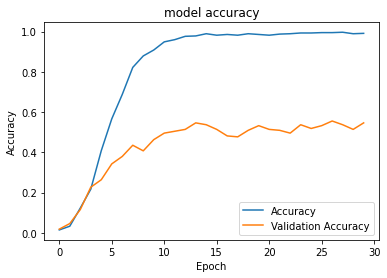

In [6]:
#Presenting accuracy of a model
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

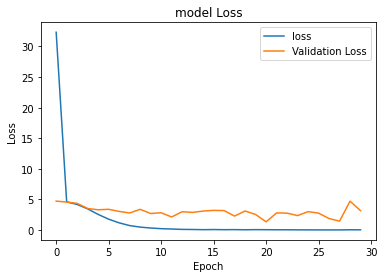

In [7]:
#Presenting loss of a model
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])
plt.show()

In [ ]:
model.save("/home/sushant/Desktop/Study/DL/Project/model.h5")